In [0]:
GLOBALS__={}

In [2]:
#@title Настройки { run: "auto", vertical-output: true, display-mode: "form" }
USD_to_RUB = 34.02 #@param {type:"number"}
RUB_to_USD = 1.0/USD_to_RUB

# print('USD_to_RUB=',USD_to_RUB)
# print('RUB_to_USD=',RUB_to_USD)



currency_converter = {
  'USD': USD_to_RUB,
  'RUB': 1.0
}

print(currency_converter)

{'USD': 34.02, 'RUB': 1.0}


#MAIN

In [3]:
#@title Обработка документов { vertical-output: true, output-height: 800, form-width: "300px", display-mode: "form" }


import os
import sys



def interactive_upload(filetype):
  from google.colab import files
  import docx2txt

  print(f'Please select "{filetype}" .docx file:')
  uploaded = files.upload()
  docs = []
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

    with open(fn, "wb") as df:
      df.write(uploaded[fn])
      df.close()

    # extract text

    text = ''
    try:
      text = docx2txt.process(fn)
    except:
      print("Unexpected error:", sys.exc_info())
      os.system('antiword -w 0 "' + fn + '" > "' + fn + '.txt"')
      with open(fn + '.txt') as f:
        text = f.read()
    print("Символов в оригинальном документе:", len(text))
    docs.append(text)
    return docs


# ====================================
# ====================================
_git_branch = "stucture-finder"  # @param {type:"string"}
# ====================================
# ====================================
 



#''' AZ:-IMPORT CODE GITHUB----------------------------------------------😺------ '''
import sys


def _init_import_code_from_gh():
  if 'GLOBALS__' not in globals():
    print('adding global GLOBALS__')
    global GLOBALS__
    GLOBALS__ = {}

  if '_init_import_code_from_gh' in GLOBALS__:
    print('👌 code already imported from GitHub!')
    return

  import subprocess
  def exec(x):
    r = subprocess.check_output(x, shell=True)
    r = r.decode('unicode-escape').encode('latin1').decode('utf8')
    print(r)

  print(f"fetching code from GitHub.....{_git_branch}")
  try:
    exec('rm -r nlp_tools')
  except:
    pass
  exec(f'git clone --single-branch --branch {_git_branch} https://github.com/compartia/nlp_tools.git nlp_tools')

  print('🦊 GIT revision:')
  exec('cd nlp_tools\ngit rev-list --reverse HEAD | awk "{ print NR }" | tail -n 1\ngit branch\ngit log -3 --pretty=%B')

  sys.path.insert(0, 'nlp_tools')

  # self-test
  from text_tools import untokenize
  print(untokenize(['code', 'imported', 'OK 👍']))

  print('installing antiword...')
  exec('sudo apt-get install antiword')

  print('installing docx2txt...')
  exec("pip install docx2txt")

  GLOBALS__['_init_import_code_from_gh'] = True


  ''' AZ:-------------------------------------------------IMPORT CODE GITHUB-😺---'''
  print('❤️ DONE importing Code fro GitHub')


  
  
# AZ:-INIT ELMO-----------------------------------------------------------------------------------

import tensorflow as tf
import tensorflow_hub as hub


def _import_elmo():
  """
  ACHTUNG!! this method is called later by ElmoEmbedder
  """



  elmo = hub.Module('https://storage.googleapis.com/az-nlp/elmo_ru-news_wmt11-16_1.5M_steps.tar.gz',
                    trainable=False)  # twitter
  print('❤️ ❤️ ❤️ DONE (re)importing Tensorflow hub.Module ')
  print('Tensorflow version is', tf.__version__)

  return elmo



# AZ:-INIT EMBEDDER-----------------------------------------------------------------------------------

def _init_embedder():
  if 'elmo_embedder' in GLOBALS__:
    print('👌 Embedder is already created! ')
    return

  from embedding_tools import ElmoEmbedder
  GLOBALS__['elmo_embedder'] = ElmoEmbedder(_import_elmo(), tf, 'elmo', _import_elmo)

  print('❤️ DONE creating words embedding model')
  return GLOBALS__['elmo_embedder']


# AZ:-Init chartes context-----------------------------------------------------------------------------------
def _init_charters():
  if 'CharterAnlysingContext' in GLOBALS__:
    print('👌 Charters-related tools are already inited ')
    return

  _init_embedder()# PRECONDITION
  from charter_patterns import CharterPatternFactory 
  from charter_parser import CharterDocumentParser
  CPF = CharterPatternFactory( GLOBALS__[ 'elmo_embedder']  )  
  GLOBALS__['CharterAnlysingContext'] = CharterDocumentParser(CPF)
  print('❤️ DONE initing Charters-related tools and models ')


def _init_contracts():
  if 'ContractAnlysingContext' in GLOBALS__:
    print('👌 Contracts-related tools are already inited ')
    return

  from demo import ContractAnlysingContext
  GLOBALS__['ContractAnlysingContext'] = ContractAnlysingContext(GLOBALS__['elmo_embedder'], GLOBALS__['renderer'])
  print('❤️ DONE initing Contracts-related tools and models ')


# AZ:- THE CODE----------------------------------------------------------------------------------
def _init_the_code(reset=False):
  if '_init_the_code' in GLOBALS__ and not reset:
    print('👌 Code is alredy imported!')
    return

  import matplotlib as mpl
  from IPython.core.display import display, HTML
  import matplotlib.pyplot as plt
  from renderer import AbstractRenderer, head_types_colors
  from transaction_values import ValueConstraint
  from legal_docs import org_types
  from parsing import head_types_dict, head_types
  
  class DemoRenderer(AbstractRenderer):

    def render_subj(self, doc):
      from demo import subject_types_dict
      subj = doc.subject
      s_name = subject_types_dict[subj[0]].upper()

      display(
        HTML(f'Предмет договора:<h3 style="margin:0">{s_name}<sup> {subj[0]}</sup> </h3> confidence:{subj[1]:20,.2f}'))

    def sign_to_text(self, sign: int):
      if sign < 0: return " &lt; "
      if sign > 0: return " &gt; "
      return ' = '

    def probable_value_to_html(self, pv):

      vc = pv.value

      color = '#333333'
      if vc.sign > 0:
        color = '#993300'
      elif vc.sign < 0:
        color = '#009933'

      return f'<b style="color:{color}">{self.sign_to_text(vc.sign)} {vc.currency} {vc.value:20,.2f} confidence={pv.confidence:20,.2f}</b> '

    def render_contents(doc):
      html = '<h3>Выявленное Содержание документа</h4>'
      html += "<ul>"
      for i in doc.structure.headline_indexes:
        line = doc.structure.structure[i].to_string(doc.tokens_cc)
        html += f'<li> {line} <sup>line {i}</sup></li>'
      html += "</ul>"

      display(HTML(html))

    def render_sections(sections):
      from legal_docs import HeadlineMeta
      html = '<h3>Выявленное секции документа</h4>'
      html += "<ul>"
      for section_type in sections:
        section: HeadlineMeta = sections[section_type]
        body = section.body.untokenize_cc()[:1000]
        headline = section.subdoc.untokenize_cc()[:500]
        #     line = doc.structure.structure[i].to_string(doc.tokens_cc)
        html += f'<li><h3> {headline} <sup>type: {section_type}</sup> </h3> <p>{body}</p> </li>'
      html += "</ul>"

      display(HTML(html))

    def render_values(self, values):
      if len(values) > 0:
        for pv in values:
          h = self.probable_value_to_html(pv)
          display(HTML(h))
      else:
        display(HTML('сумма не найдена'))

    def render_contents(self, doc):
      html = '<h3>Выявленное Содержание документа</h4>'
      html += "<ul>"
      for i in doc.structure.headline_indexes:
        line = doc.structure.structure[i].to_string(doc.tokens_cc)
        html += f'<li> {line} <sup>line {i}</sup></li>'
      html += "</ul>"

      display(HTML(html))

    def render_value_section_details(self, value_section_info):
      value_section = value_section_info.body
      headline_doc = value_section_info.subdoc

      headline = headline_doc.untokenize_cc()

      v_names = {
        'value_attention_vector',
        'novalue_attention_vector',

        'novalue_attention_vector_local_contrast',
        'value_attention_vector_tuned'}

      fig = plt.figure(figsize=(20, 6))
      ax = plt.axes()
      for vector_name in v_names:
        ax.plot(value_section.distances_per_pattern_dict[vector_name], label=vector_name, alpha=0.4);
      ax.plot(value_section.distances_per_pattern_dict['value_attention_vector_tuned'], label=vector_name.upper(),
              alpha=0.9, color='black');
      plt.legend(loc='upper right')

      text = self.to_color_text(value_section.tokens_cc,
                                value_section.distances_per_pattern_dict['value_attention_vector_tuned'], _range=(0, 1))
      html = f'<h3>{headline}</h3> <div style="margin-left:4em; font-size=90%">{text}</div>'
      display(HTML(html))

    def to_color_text(self, tokens, weights, colormap='coolwarm', print_debug=False, _range=None):
      if len(tokens) == 0:
        return " - empty -"
      if len(weights) != len(tokens):
        raise ValueError("number of weights differs weights={} tokens={}".format(len(weights), len(tokens)))

      #   if()
      vmin = weights.min()
      vmax = weights.max()

      if _range is not None:
        vmin = _range[0]
        vmax = _range[1]

      if print_debug:
        print(vmin, vmax)

      norm = mpl.colors.Normalize(vmin=vmin - 0.5, vmax=vmax)
      html = ""
      cmap = mpl.cm.get_cmap(colormap)

      for d in range(0, len(weights)):
        word = tokens[d]
        if word == ' ':
          word = '&nbsp;_ '

        html += '<span title="{} {:.4f}" style="background-color:{}">{} </span>'.format(
          d,
          weights[d],
          mpl.colors.to_hex(cmap(norm(weights[d]))),
          word)

        #     html+='<span style="background-color:' +mpl.colors.to_hex(cmap(norm(weights[d]) ))+ '">' + str(tokens[d]) + " </span>"
        if tokens[d] == '\n':
          html += "<br>"

      return html

    def _render_sentence(self, sentence):
      html = ""
      constraints: List[ValueConstraint] = sentence['constraints']
      for probable_v in constraints:
        html += self.value_to_html(probable_v.value)

      if len(constraints) > 0:
        html += '<div style="border-bottom:1px solid #ccc; margin-top:1em"></div>'
        section = sentence['subdoc']
        html += self.to_color_text(section.tokens, section.distances_per_pattern_dict['deal_value_attention_vector'])
      return html

    def render_constraint_values(self, rz):

      html = ''
      for head_type in rz.keys():

        r_by_head_type = rz[head_type]

        html += '<hr style="margin-top: 45px">'
        html += '<i style="padding:0; margin:0">решения о пороговых суммах, которые принимает</i><h2 style="color:{}; padding:0;margin:0">{}</h2>'.format(
          head_types_colors[head_type],
          head_types_dict[head_type])

        sentences = r_by_head_type['sentences']
        html += '<h4>{}</h4>'.format(r_by_head_type['caption'])
        html += '<div style="padding-left:80px">'

        if True:
          if len(sentences) > 0:
            for sentence in sentences:
              html += self._render_sentence(sentence)

          else:
            html += '<h4 style="color:crimson">Пороговые суммы не найдены или не заданы</h4>'

        html += '</div>'

      return html

    def render_charter_parsing_results(self, org, rz):
      txt_html = self.to_color_text(org['tokens'], org['attention_vector'], _range=[0, 1])

      html = '<div style="background:#eeeeff; padding:0.5em"> recognized NE(s): <br><br> org type:<h3 style="margin:0">  {} </h3>org full name:<h2 style="margin:0">  {} </h2> <br>quote: <div style="font-size:90%; background:white">{}</div> </div>'.format(
        org['type_name'], org['name'], txt_html)
      # html+=txt_html
      html += self.render_constraint_values(rz)

      display(HTML(html))

    def render_color_text(self, tokens, weights, colormap='coolwarm', print_debug=False, _range=None):
      html = self.to_color_text(tokens, weights, colormap, print_debug, _range)
      display(HTML(html))

    def print_results(self, doc, results):
      result, (start, end), sentence, meta = results

      html = "<hr>"

      html += self._render_doc_subject_fragments(doc)

      if result is None:
        html += '<h2 style="color:red">СУММА НЕ НАЙДЕНА</h2>'
      else:
        html += '<h2>' + str(result[0]) + ' ' + str(result[1]) + '</h2>'

      for key in meta.keys():
        html += '<div style="font-size:9px">' + str(key) + " = " + str(meta[key]) + "</div>"

      display(HTML(html))
      self.render_color_text(doc.tokens[start:end], doc.sums[start:end])

  GLOBALS__['renderer'] = DemoRenderer()

  
  # AZ:----------PROTOCOLS RENDERER-------------------------

  from legal_docs import LegalDocument

  import matplotlib as mpl
  from IPython.core.display import display, HTML
  from renderer import  as_headline_3
  class ProtocolRenderer(DemoRenderer):

    def winning_patterns_to_html(self, _tokens, ranges, winning_patterns, _range,
                                 colormaps=['Reds', 'Purples', 'Blues', 'Greens', 'Greys']):
      vmin = -ranges[1]
      vmax = -ranges[0]

      #     print("winning_patterns_to_html _range", _range, "min max=", ranges)

      norm = mpl.colors.Normalize(vmax=vmax, vmin=vmin)

      cmaps = []

      #     print (colormaps)
      for n in colormaps:
        cmap = mpl.cm.get_cmap(n)
        cmaps.append(cmap)

      html = ""

      for d in _range:
        winning_pattern_i = winning_patterns[d][0]
        colormap = cmaps[winning_pattern_i % len(colormaps)]
        normed = norm(-winning_patterns[d][1])
        color = mpl.colors.to_hex(colormap(normed))
        html += '<span title="' + '{} {:.2f}'.format(d, winning_patterns[d][
          1]) + '" style="background-color:' + color + '">' + str(
          _tokens[d]) + " </span>"
        if _tokens[d] == '\n':
          html += "<br>"

      return html

    def _render_doc_subject_fragments(self, doc):
      #     print(doc.per_subject_distances)

      _html = ""
      if doc.per_subject_distances is not None:

        type = "Договор  благотворительного пожертвования"
        if doc.per_subject_distances[0] > doc.per_subject_distances[1]:
          type = "Договор возмездного оказания услуг"

        _html += "<h3>" + type + "</h3>"

        colormaps = ['PuRd'] * 5 + ['Blues'] * 7 + ['Greys']

        _html += as_headline_4('Предмет договора')

        for region in [doc.subj_range]:
          _html += self.winning_patterns_to_html(_tokens=doc.tokens, ranges=doc.subj_ranges,
                                                 winning_patterns=doc.winning_subj_patterns, _range=region,
                                                 colormaps=colormaps)

      return _html

    def render_subject(self, counter):
      html = as_headline_3('Предмет документа (X):') + self.subject_type_weights_to_html(counter)
      display(HTML(html))

    def print_results(self, _doc: LegalDocument, results=None):

      if results is None:
        results = _doc.found_sum

      result, (start, end), sentence, meta = results

      html = "<hr>"

      html += self._render_doc_subject_fragments(_doc)

      if result is None:
        html += '<h2 style="color:red">СУММА НЕ НАЙДЕНА</h2>'
      else:
        html += '<h2>' + str(result[0]) + ' ' + str(result[1]) + '</h2>'

      for key in meta.keys():
        html += '<div style="font-size:9px">' + str(key) + " = " + str(meta[key]) + "</div>"

      display(HTML(html))
      self.render_color_text(_doc.tokens[start:end], _doc.sums[start:end])

    def subject_type_weights_to_html(self, counter):
      dict = {
        't_dea': 'Сделка',
        't_cha': 'Благотворительность',
        't_org': 'Организационные решения'
      }

      maxkey = "None"
      for key in dict:
        if counter[key] > counter[maxkey]:
          maxkey = key

      html = ""
      for key in dict:
        templ = "<div>{}: {}</div>"
        if key == maxkey:
          templ = '<b style="font-size:135%; color:maroon">{}: {}</b>'
        html += templ.format(counter[key], dict[key])

      return html

  GLOBALS__['ProtocolRenderer'] = ProtocolRenderer()
  
  from demo_protocols import ProtocolAnlysingContext
  GLOBALS__['ProtocolAnlysingContext'] = ProtocolAnlysingContext(GLOBALS__['elmo_embedder'],
                                                                 GLOBALS__['ProtocolRenderer'])
  GLOBALS__['_init_the_code'] = True
    # AZ:-------------------------------------------------Init Protocols context===
  

  # AZ:-------------------------------------------------Init Charters context====

  def read_doc(fn):
    import docx2txt, sys, os
    text = ''
    try:
      text = docx2txt.process(fn)
    except:
      print("Unexpected error:", sys.exc_info())
      os.system('antiword -w 0 "' + fn + '" > "' + fn + '.txt"')
      with open(fn + '.txt') as f:
        text = f.read()

    return text

  GLOBALS__['read_doc'] = read_doc

  print("❤️ DONE initializing the code")


# AZ:-FINDING_VIOLATIONS--------------------------------------------------------
def find_and_show_violations():
  from IPython.core.display import display, HTML

  from demo import ContractAnlysingContext
  from renderer import as_headline_2, as_error_html

  print('Поиск нарушений')

  charterAnlysingContext: CharterAnlysingContext = GLOBALS__['CharterAnlysingContext']
  contractAnlysingContext: ContractAnlysingContext = GLOBALS__['ContractAnlysingContext']

  contract = contractAnlysingContext.contract
  charter = charterAnlysingContext.doc
  charter_constraints = charterAnlysingContext.constraints  # XXX: move to doc

  renderer = GLOBALS__['renderer']
  renderer.render_subj(contract)

  import copy

  def convert(v):
    v_converted = copy.copy(v)
    if v.currency in currency_converter:
      v_converted.value = currency_converter[v.currency] * v.value
      v_converted.currency = 'RUB'
      return v_converted
    else:
      display(HTML(as_error_html(
        f"мы не в настроении (пока) конвертировать {v.currency} --> RUB. Это вообще валюта какой страны? Румынии?")))
      return v

  best_value = contractAnlysingContext.find_contract_best_value(convert)

  # rendering:----------------------------

  def _render_violations(ranges_by_group, best_value):
    for group_key in ranges_by_group:
      group = ranges_by_group[group_key]
      display(HTML(as_headline_2(group['name'])))

      for rk in group['ranges']:
        r = group['ranges'][rk]
        display(HTML(r.check_contract_value(best_value, convert, renderer)))

  print("Сумма Договора:")
  renderer.render_values([best_value])
  renderer.render_color_text(best_value.value.context[0], best_value.value.context[1], _range=[0, 1])

  _render_violations(
    charterAnlysingContext.find_ranges_by_group(charter_constraints, convert, verbose=False),
    best_value)


#   display(HTML(renderer.render_constraint_values(charter_constraints)))


# AZ:--------------------------------------------------------FINDING_VIOLATIONS-

# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXXX
# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXXX
# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXXX
# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXX

W0421 19:45:03.135894 140215871616896 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


# step 0. Инит всега

In [5]:
## do preparation here

# 1.
_init_import_code_from_gh()
# 2.
_init_embedder()
# 3.
_init_the_code()
4.
_init_charters()
# 5.
_init_contracts()

fetching code from GitHub.....stucture-finder


🦊 GIT revision:
296
* stucture-finder
fix

Patterns

Fix embedding


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
code imported OK 👍
installing antiword...
Reading package lists...
Building dependency tree...
Reading state information...
antiword is already the newest version (0.37-11build1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 6 not upgraded.

installing docx2txt...

❤️ DONE importing Code fro GitHub
Instructions for updating:
Colocations handled automatically by placer.


W0421 19:46:36.472766 140215871616896 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/control_flow_ops.py:3632: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


❤️ ❤️ ❤️ DONE (re)importing Tensorflow hub.Module 
Tensorflow version is 1.13.1
❤️ DONE creating words embedding model
❤️ DONE initializing the code
👌 Embedder is already created! 
🐌 Embedding 545 words... it takes time (☕️?)..
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0421 19:46:40.421509 140215871616896 saver.py:1483] Saver not created because there are no variables in the graph to restore


Embedding complete 🐌 ; the shape is (57, 20, 1024)
❤️ DONE initing Charters-related tools and models 
🐌 Embedding 176 words... it takes time (☕️?)..
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0421 19:46:44.978871 140215871616896 saver.py:1483] Saver not created because there are no variables in the graph to restore


Embedding complete 🐌 ; the shape is (12, 33, 1024)
🐌 Embedding 221 words... it takes time (☕️?)..
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0421 19:46:47.514263 140215871616896 saver.py:1483] Saver not created because there are no variables in the graph to restore


Embedding complete 🐌 ; the shape is (30, 29, 1024)
🐌 Embedding 86 words... it takes time (☕️?)..
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0421 19:46:50.171355 140215871616896 saver.py:1483] Saver not created because there are no variables in the graph to restore


Embedding complete 🐌 ; the shape is (15, 13, 1024)
❤️ DONE initing Contracts-related tools and models 


# step 1. Устафф

In [6]:
uploaded = interactive_upload('Устафф, он лёххх, но подумафф он осознал, что он не такой уж и Лёхх')

GLOBALS__['CharterAnlysingContext'].verbosity_level=2
org, rz = GLOBALS__['CharterAnlysingContext'].analyze_charter(uploaded[0], True)
doc = GLOBALS__['CharterAnlysingContext'].doc


GLOBALS__['renderer'].render_contents(doc)
GLOBALS__['renderer'].render_charter_parsing_results(org, rz)




Please select "Устафф, он лёххх, но подумафф он осознал, что он не такой уж и Лёхх" .docx file:


Saving ЕЮ Устав.docx to ЕЮ Устав (2).docx
User uploaded file "ЕЮ Устав.docx" with length 130684 bytes
Символов в оригинальном документе: 149039
Embedding region: 0 7200
🐌 Embedding 7200 words... it takes time (☕️?)..
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0421 19:47:16.180087 140215871616896 saver.py:1483] Saver not created because there are no variables in the graph to restore


Embedding complete 🐌 ; the shape is (1, 7200, 1024)
Function _emb called 1 times. 
Execution time max: 19.4806, average: 19.4806
Embedding region: 6000 7200
🐌 Embedding 7200 words... it takes time (☕️?)..
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0421 19:47:35.975018 140215871616896 saver.py:1483] Saver not created because there are no variables in the graph to restore


Embedding complete 🐌 ; the shape is (1, 7200, 1024)
Function _emb called 2 times. 
Execution time max: 19.8071, average: 19.6438
Embedding region: 12000 7200
🐌 Embedding 7200 words... it takes time (☕️?)..
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0421 19:47:55.605384 140215871616896 saver.py:1483] Saver not created because there are no variables in the graph to restore


Embedding complete 🐌 ; the shape is (1, 7200, 1024)
Function _emb called 3 times. 
Execution time max: 19.8071, average: 19.6749
Embedding region: 18000 4593
🐌 Embedding 4593 words... it takes time (☕️?)..
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0421 19:48:15.609728 140215871616896 saver.py:1483] Saver not created because there are no variables in the graph to restore


Embedding complete 🐌 ; the shape is (1, 4593, 1024)
Function _emb called 4 times. 
Execution time max: 19.8071, average: 18.4005
Function _emb called 4 times. 
Execution time max: 19.8071, average: 18.4005
Function _embedd_large called 1 times. 
Execution time max: 73.6780, average: 73.6780
----WARNING!: function rectifyed_sum_by_pattern_prefix is deprecated
----WARNING!: function subdoc is deprecated
----------------- LegalDocument charter.name.undef deleted. Ciao bella!
❤️ ACCOMPLISHED: 	 0.	 extracting NERs (named entities)
❤️ ACCOMPLISHED: 	 1.	 detecting sections: "{'head.all': <legal_docs.HeadlineMeta object at 0x7f847ee26ef0>, 'head.directors': <legal_docs.HeadlineMeta object at 0x7f847ee26e48>}" 
extract_constraint_values_from_section head.all
----WARNING!: function make_constraints_attention_vectors is deprecated
extract_constraint_values_from_section embedding....
❤️ ACCOMPLISHED: 	 2.	 Finding margin transaction values in section Общее собрание акционеров
extract_constraint_

### tests, experiments

In [0]:
if False:
  GLOBALS__['CharterAnlysingContext'].verbosity_level=2
  org, rz = GLOBALS__['CharterAnlysingContext'].analyze_charter(text, True)
  doc = GLOBALS__['CharterAnlysingContext'].doc


  GLOBALS__['renderer'].render_contents(doc)
  GLOBALS__['renderer'].render_charter_parsing_results(org, rz)

In [0]:
if False:
  doc.embedd(GLOBALS__['ContractAnlysingContext'].hadlines_factory)


In [0]:
if False:
  # GLOBALS__['ContractAnlysingContext'].hadlines_factory.

  doc.calculate_distances_per_pattern(GLOBALS__['CharterAnlysingContext'].hadlines_factory)



In [24]:
# print(doc.distances_per_pattern_dict.keys())
from legal_docs import rectifyed_sum_by_pattern_prefix

from ml_tools import max_exclusive_pattern_by_prefix




vv = max_exclusive_pattern_by_prefix(doc.distances_per_pattern_dict, 'headline.name.1')
print(vv[0:10])



# GLOBALS__['renderer'].render_color_text(doc.tokens_cc, vv)

for s in doc.sections:
  print (s)
  
if 'head.directors' in doc.sections:
  subdoc = doc.sections['head.directors'].body
  for ky in subdoc.distances_per_pattern_dict:
    print(ky)
  GLOBALS__['renderer'].render_color_text(subdoc.tokens_cc, subdoc.distances_per_pattern_dict['deal_attention_vector'])
  


[0.19743329 0.22146811 0.24918829 0.22337721 0.22926465 0.20299865
 0.21362607 0.16192883 0.14344864 0.17104457]
name
head.all
head.directors
competence
headline.head.directors.n
ha$.headline.head.directors
headline.head.all.n.a
headline.head.all.n.p
ha$.headline.head.all
headline.head.gen.2
ha$.headline.head.gen
headline.head.pravlenie.n
ha$.headline.head.pravlenie
headline.name.1
headline.name.2
headline.name.3
headline.name.4
headline.name.5
headline.name.6
ha$.headline.name
sum_max1
sum_max2
sum_max3
sum_max4
sum_max5
sum_max6
sum_max7
sum_max8
sum_max9
sum__lt_1
sum__lt_2
sum__lt_3
sum__lt_4
sum__lt_4.1
sum__lt_5
sum__lt_6
sum__lt_7
sum__lt_8
sum__lt_9
sum__lt_10
sum__lt_11
sum__gt_1
sum__gt_2
sum__gt_3
sum__gt_4
d_order_consent
d_order_solution
d_order_consent_1
d_order_deal.1
d_order_deal.2
value_attention_vector
deal_attention_vector
deal_value_attention_vector
margin_attention_vector
margin_value_attention_vector


In [37]:
from patterns import AbstractPatternFactoryLowCase
class Tfa(AbstractPatternFactoryLowCase):

  def __init__(self, embedder):
    AbstractPatternFactoryLowCase.__init__(self, embedder)
    self._build_subject_patterns()
    self.embedd()

  def _build_subject_patterns(self):
    def cp(name, tuples):
      return self.create_pattern(name, tuples)
     
    
    cp('x_charity_1', ('договор',
                       'благотворительного',
                       'пожертвования'))
    
    cp('x_charity_1.1', ('одобрение внесения Обществом каких-либо вкладов или пожертвований на политические или',
                       'благотворительные',
                       'цели'))
    
    cp('x_charity_1.2', ('одобрение внесения Обществом каких-либо вкладов или',
                       'пожертвований',
                       'на политические или благотворительные цели '))
 

    cp('x_charity_2', ('предоставление',
                       'безвозмездной',
                       'помощи финансовой'))

     
 
    
    
TFAA = Tfa(GLOBALS__['elmo_embedder'])

🐌 Embedding 43 words... it takes time (☕️?)..
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0421 20:17:35.988560 140215871616896 saver.py:1483] Saver not created because there are no variables in the graph to restore


Embedding complete 🐌 ; the shape is (5, 12, 1024)


In [90]:
subdoc = doc.sections['head.directors'].body
subdoc.calculate_distances_per_pattern(TFAA)
print('ok')

ok


In [91]:
# GLOBALS__['renderer'].render_color_text(subdoc.tokens_cc, subdoc.distances_per_pattern_dict['x_charity_1.2'], _range=(0,1))
# x = max_exclusive_pattern_by_prefix(subdoc.distances_per_pattern_dict, 'x_charity_')
import numpy as np
from ml_tools import filter_values_by_key_prefix,max_exclusive_pattern, momentum, smooth_safe, smooth
from patterns import improve_attention_vector
vectors = filter_values_by_key_prefix(subdoc.distances_per_pattern_dict, 'x_charity_')
vectors_i=[]
for v in vectors:
  if max(v)>0.6:
    vector_i, _ = improve_attention_vector(subdoc.embeddings, v, relu_th=0.6, mix=0.8)
    vectors_i.append(vector_i)
  else:
    vectors_i.append(v)
    
x = max_exclusive_pattern(vectors_i)

i = np.argmax(x)
sl = slice( i-150, i+150)
    
GLOBALS__['renderer'].render_color_text(subdoc.tokens_cc[sl], x[sl], _range=(0,1))

In [0]:
 

level_by_line = [ max ( i._possible_levels) for i in doc.structure.structure ]
 


headlines_attention_vector=[]
for i in doc.structure.structure:
  l = i.span[1]-i.span[0]
  headlines_attention_vector+=[level_by_line[ i.line_number ]]*l
  
# print (pv[0:100])
headlines_attention_vector = normalize(headlines_attention_vector)
headlines_attention_vector = relu(headlines_attention_vector, 0.4)

# headlines_attention_vector = smooth(headlines_attention_vector, 20)

av= relu(headlines_attention_vector/2 + vv, 0.6)
av = momentum(av, 0.99)

GLOBALS__['renderer'].render_color_text(doc.tokens_cc, av)




## Meta-pattern! (Cool!!(!))
типа самообучение

In [0]:
# ---------
from patterns import FuzzyPattern
best_id=np.argmax(av)
best_embedding_v = doc.embeddings[best_id]

meta_pattern=FuzzyPattern('s-meta-na')
meta_pattern.embeddings =  np.array([ best_embedding_v ])

meta_pattern_attention = 1.0 - meta_pattern._eval_distances(doc.embeddings)
meta_pattern_attention = relu(meta_pattern_attention,  0.7)


GLOBALS__['renderer'].render_color_text(doc.tokens_cc, meta_pattern_attention, _range=(0,1))

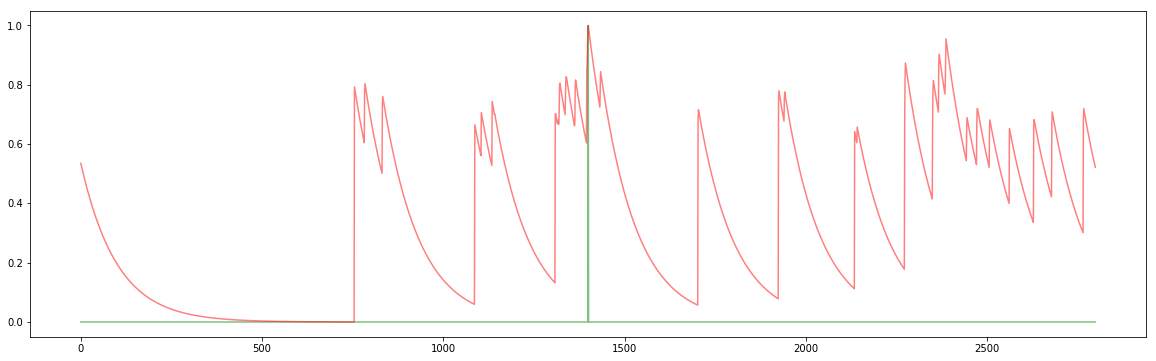

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 6))
ax = plt.axes()
span=1400
ax.plot(meta_pattern_attention[best_id-span:best_id+span], alpha=0.5, color='green', label='meta_pattern_attention');
ax.plot(normalize(av[best_id-span:best_id+span]), alpha=0.5, color='red', label='av');
 

# step 2. Договор

In [0]:
 

uploaded = interactive_upload('Договор в законе')

GLOBALS__['ContractAnlysingContext'].analyze_contract(uploaded[0])
doc = GLOBALS__['ContractAnlysingContext'].contract

GLOBALS__['renderer'].render_subj(doc)
GLOBALS__['renderer'].render_contents(doc)




Please select "Договор в законе" .docx file:


Saving МНГ1 Договор купли-продажи АЗС № 24.docx to МНГ1 Договор купли-продажи АЗС № 24.docx
User uploaded file "МНГ1 Договор купли-продажи АЗС № 24.docx" with length 36979 bytes
Символов в оригинальном документе: 12060
❤️ ACCOMPLISHED: 	 0.	 parsing document and detecting document high-level structure
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0418 19:40:04.890320 140433039415168 saver.py:1483] Saver not created because there are no variables in the graph to restore


Cannot find headline matching pattern "headline.def"
Cannot find headline matching pattern "headline.price."
Cannot find headline matching pattern "headline.pricecond"
Cannot find headline matching pattern "headline.terms"
Cannot find headline matching pattern "headline.break"
Cannot find headline matching pattern "headline.rights"
Cannot find headline matching pattern "headline.obl"
Cannot find headline matching pattern "headline.confidence"
Cannot find headline matching pattern "headline.appl"
Cannot find headline matching pattern "headline.addresses"
Cannot find headline matching pattern "headline.conficts"
❤️ ACCOMPLISHED: 	 1.	 embedding headlines into semantic space
⚠️ WARNING: - Раздел про стоимость сделки не найден!
- Ищем стоимость в разделе ПРЕДМЕТ ДОГОВОРА.
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0418 19:40:12.505151 140433039415168 saver.py:1483] Saver not created because there are no variables in the graph to restore


Function calculate_distances_per_pattern called 67 times. 
Execution time max: 35.7906, average: 0.5709
Function _emb called 6 times. 
Execution time max: 36.6306, average: 18.4169
Function _embedd_large called 1 times. 
Execution time max: 97.5495, average: 97.5495
alt price section DOC --------------------


❤️ ACCOMPLISHED: 	 2.	 searching for transaction values in section  "ПРЕДМЕТ ДОГОВОРА."
⚠️ WARNING: - В разделе "ПРЕДМЕТ ДОГОВОРА." стоимость сделки не найдена!
⚠️ WARNING: - Ищем стоимость во всем документе!


# step 3. Поиск вреда

In [0]:
find_and_show_violations()

# step 4. Протокол



In [0]:
uploaded = interactive_upload('Протокол, протокую и буду протоковать')
GLOBALS__['ProtocolAnlysingContext'].process(uploaded[0])

Please select "Протокол, протокую и буду протоковать" .docx file:


Saving МНГ1 Протокол МНГ_продажа АЗС.docx to МНГ1 Протокол МНГ_продажа АЗС.docx
User uploaded file "МНГ1 Протокол МНГ_продажа АЗС.docx" with length 32862 bytes
Символов в оригинальном документе: 3960
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0418 19:42:13.469101 140324294715264 saver.py:1483] Saver not created because there are no variables in the graph to restore


❤️ ACCOMPLISHED: 	 0.	 Pattern factory created, patterns embedded into ELMO space


TypeError: ignored

In [0]:
## do preparation here   

#1.
_init_import_code_from_gh()
#2.
_init_embedder()
#3.
_init_the_code()
#4. 
_init_charters()
#5. 
# _init_contracts()

# Sample Charter

In [0]:
SAMPLE="""
 

Общие положения





 


Уставный капитал


xxvii Уставный капитал Общества составляется из номинальной стоимости долей его Участников и составляет  6 734 244 615 (Шесть миллиардов семьсот тридцать четыре миллиона двести сорок четыре тысячи шестьсот пятнадцать) рублей.



xxxv Общее собрание участников не вправе принимать решение о распределении прибыли Общества между Участниками Общества:

       • до полной оплаты всего уставного капитала Общества;

     

Органы управления


lxxxiv Органами управления Общества являются:


       • Общее собрание участников Общества;


       • Совет директоров – Коллегиальный орган управления;


       • Правление Общества - Коллегиальный исполнительный орган;


       • Генеральный директор - Единоличный исполнительный орган.


Общее собрание участников Общества


lxxxvi Высшим органом управления Общества является Общее собрание участников Общества. Очередное Общее собрание участников Общества  рассматривает и утверждает результаты деятельности Общества за финансовый год и проводится в период с 1 марта по 30 апреля. Проводимые помимо очередного Общие собрания участников Общества являются внеочередными. Внеочередные Общие собрания участников Общества проводятся в случаях, когда этого требуют интересы Общества.


lxxxvii К исключительной компетенции Общего собрания участников Общества относятся следующие вопросы:

    

       12) установление размера, состава, формы и порядка внесения дополнительных вкладов, определение общей стоимости таких дополнительных вкладов, а также иных условий внесения дополнительных вкладов Участниками Общества;
       13) принятие решения о согласии на совершение или о последующем одобрении крупных сделок, связанных с приобретением, отчуждением или возможностью отчуждения Обществом прямо или косвенно имущества, цена или балансовая стоимость которого составляет 25 (Двадцать пять) и более процентов балансовой стоимости имущества Общества по данным бухгалтерской отчетности на последнюю отчетную дату;
       14) принятие решения о согласии на совершение или о последующем одобрении сделок, в совершении которых имеется заинтересованность, если цена или стоимость имущества, являющегося предметом сделки,  превышает 10 (десять) процентов балансовой процентов  балансовой стоимости имущества Общества по данным бухгалтерской отчетности на последнюю отчетную дату.
       15) принятие решения о реорганизации или ликвидации Общества;
       26) принятие решения о согласии на совершение или о последующем одобрении сделок мены, дарения, иных сделок, предусматривающих безвозмездное отчуждение имущества Общества либо оплату (встречное предоставление) в неденежной форме,  одобрение договоров спонсорского и благотворительного характера, независимо от суммы сделки, за исключением случаев, когда такие сделки требуют получения согласия органов управления Общества как крупные сделки и сделки с заинтересованностью;
       27) решение вопросов, отнесенных к компетенции Совета директоров, в случае, если Совет директоров не избран;
       28) решение иных вопросов, отнесенных в соответствии с действующим законодательством к компетенции Общего собрания участников Общества.



Совет директоров Общества


      1. Совет директоров осуществляет общее руководство деятельностью Общества, а также контроль над исполнением решений Общего собрания участников Общества и иной деятельностью его исполнительного органа.

      2. Совет директоров состоит из 4 (Четырех) человек.

      3. К компетенции Совета директоров относится:


      14) утверждение процедур внутреннего контроля за финансово-хозяйственной деятельностью Общества, в том числе утверждение положения о внутрихозяйственном контроле, документальных проверках и ревизиях;

      15) принятие решения о согласии на совершение или о последующем одобрении сделок, связанных с осуществлением денежных выплат и (или) приобретением, отчуждением и возможностью отчуждения, обременением и возможностью обременения Обществом имущества, в рамках которых цена предложения или стоимость отчуждаемого имущества, определенная на момент совершения сделки, превышает в рамках одной сделки или нескольких взаимосвязанных сделок, заключенных в течение 6 (шести) месяцев, в совокупности 50 000 000 (Пятьдесят миллионов) рублей или эквивалент данной суммы в иной валюте, за исключением случаев, когда такие сделки требуют получения согласия органов управления Общества  как крупные сделки и сделки с заинтересованностью, а также для сделок, одобряемых в соответствии с подпунктами 22)-26) пункта 11.2 настоящего Устава, подпунктами 17) –22), 30) пункта 12.3 настоящего Устава;

      16) принятие решения о начале/урегулировании любых судебных споров и разбирательств, цена иска по которым превышает 50 000 000 (Пятьдесят миллионов) рублей (или эквивалент в другой валюте) в том числе, подписание мирового соглашения, признание иска, отказ от иска, а также совершение любых других процессуальных действий, кроме судебных споров, принятие решения, в отношении которых отнесено к компетенции Общего собрания участников Общества;


Правление Общества


 1. Правление является Коллегиальным исполнительным органом Общества. Правление Общества избирается Общим собранием участников Общества в количестве  2 (Двух) человек – членов Правления Общества.


12. В случае непринятия Правлением решения по одному и тому же вопросу в ходе 2 (Двух) надлежаще созванных заседаний Правления по любым причинам, включая отсутствие кворума и недостаточность количества голосов для принятия решения, вопрос, по которому не было принято решение, выносится на рассмотрение Совета директоров (включается в повестку дня следующего созываемого Совета директоров). Во избежание сомнений, решение не может рассматриваться как непринятое для целей настоящего пункта, в случае, если решение не принято вследствие того, что против него проголосовали или воздержались от голосования все члены Правления.

13. К компетенции Правления Общества относятся:



         • согласование кандидатур на должности руководителей структурных подразделений (за исключением филиалов и представительств) Общества, а также условий трудовых договоров с указанными лицами, согласование освобождения от должностей указанных лиц;


         • принятие решения о согласии на совершение или о последующем одобрении сделок, связанных с осуществлением денежных выплат и (или) приобретением, отчуждением и возможностью отчуждения, обременением и возможностью обременения Обществом имущества, стоимость которого в рамках одной сделки или нескольких взаимосвязанных сделок в совокупности составляет от 1 000 000 (Одного) миллиона рублей до 50 000 000 (Пятьдесят миллионов) рублей или эквивалент данной суммы в иной валюте, за исключением случаев, когда  такие сделки требуют получения согласия органов управления Общества  в соответствии с Законом и Уставом;


         • принятие решения по приемке и оплате Обществом выполненных работ по Агентскому договору на строительство объекта «Южно-Приобский газоперерабатывающий завод (ЮП ГПЗ). Газокомпрессорная станция ЮЛТ Приобского месторождения» №10-875 от 29.09.2010 г., заключенному между Обществом и ООО «Газпромнефть-Хантос».


Генеральный директор Общества


cvi Руководство текущей деятельностью Общества осуществляется единоличным исполнительным органом Общества - Генеральным директором. Генеральный директор избирается Общим собранием участников Общества сроком на 3 (Три) года, если решением Общего собрания участников не предусмотрен иной срок. Генеральный директор может быть переизбран решением Общего собрания участников Общества неограниченное количество раз. Генеральный директор действует на основании Устава Общества и трудового договора, заключаемого с ним Обществом.


       • утверждать внутренние документы, регулирующие текущую (операционную) деятельность Общества, и локальные нормативные акты (за исключением локальных нормативных актов, устанавливающих системы оплаты труда и других документов, утверждение которых отнесено к компетенции иных органов управления Общества);

       • вносить вопросы на рассмотрение Общих собраний участников Общества, заседания Совета директоров;

       • принимать решения по другим вопросам, относящимся к его компетенции.



cxlv Недействительность любого положения настоящего Устава не влечет недействительности остальных его положений. В случае вступления в силу новых нормативных актов, в соответствии с которыми отдельные положения настоящего Устава становятся недействительными, и которые требуют внести изменения в Устав, Участники обязаны принять решения о внесении соответствующих изменений в настоящий Устав.

v Полное фирменное наименование Общества на русском языке:

      Общество с ограниченной ответственностью «Южно-Приобский газоперерабатывающий завод».

      Сокращенное наименование на русском языке:

      ООО «Южно-Приобский ГПЗ».


      Полное фирменное наименование Общества на английском языке: Yuzhno-Priobsky Gaz Processing Plant Limited Liability Company.


      Сокращенное наименование на английском языке:  Yuzhno-Priobsky GPP LLC.


"""

GLOBALS__['CharterAnlysingContext'].analyze_charter(SAMPLE)

In [0]:

from IPython.core.display import display, HTML
doc = GLOBALS__['CharterAnlysingContext'].doc
GLOBALS__['renderer'].render_contents(doc)

 
GLOBALS__['renderer'].render_charter_parsing_results(GLOBALS__['CharterAnlysingContext'].org,GLOBALS__['CharterAnlysingContext'].constraints)


def render_sections(sections):
  html = '<h3>Выявленное секции документа</h4>'
  html += "<ul>"
  for section_type in sections:
    section:HeadlineMeta = sections[section_type]
    body = section.body.untokenize_cc()[:1000]
    headline = section.subdoc.untokenize_cc()[:500]
    #     line = doc.structure.structure[i].to_string(doc.tokens_cc)
    html += f'<li><h3> {headline} <sup>type: {section_type}</sup> </h3> <p>{body}</p> </li>'
  html += "</ul>"

  display(HTML(html))
  
def render_contents(doc):
  html = '<h3>Выявленное Содержание документа</h4>'
  html += "<ul>"
  for i in doc.structure.headline_indexes:
    line = doc.structure.structure[i].to_string(doc.tokens_cc)
    html += f'<li> {line} <sup>line {i}</sup></li>'
  html += "</ul>"

  display(HTML(html))
  
render_sections(doc.sections)

#Upload charter

In [0]:
if False:
  uploaded = interactive_upload('Charter')  
  org, rz = GLOBALS__['CharterAnlysingContext'] .analyze_charter(uploaded[0])




In [0]:
_init_contracts()

In [0]:
GLOBALS__

#Upload contract

In [0]:
uploaded = interactive_upload('Договор')  


In [0]:
GLOBALS__['ContractAnlysingContext'].verbosity_level=4
GLOBALS__['ContractAnlysingContext'].analyze_contract(uploaded[0])

# Violations

In [0]:
#@title Настройки { run: "auto", display-mode: "form" }
USD_to_RUB = 64.02 #@param {type:"number"}
RUB_to_USD = 1.0/USD_to_RUB

# print('USD_to_RUB=',USD_to_RUB)
# print('RUB_to_USD=',RUB_to_USD)



currency_converter = {
  'USD': USD_to_RUB,
  'RUB': 1.0
}

print(currency_converter)

find_and_show_violations()

In [0]:
doc=GLOBALS__['ContractAnlysingContext'].contract
GLOBALS__['renderer'].render_contents(doc)


In [0]:


h = GLOBALS__['renderer'].render_constraint_values(GLOBALS__['CharterAnlysingContext'].constraints)
display(HTML(h))




#violations (move and erase)

In [0]:
from transaction_values import ValueConstraint

print('Поиск нарушений')
from IPython.core.display import display, HTML

contract = GLOBALS__['ContractAnlysingContext'].contract
charter = GLOBALS__['CharterAnlysingContext'].doc
charter_constraints = GLOBALS__['CharterAnlysingContext'].constraints  # XXX: move to doc

#       h = GLOBALS__['renderer'].render_constraint_values(GLOBALS__['CharterAnlysingContext'].constraints)
#       display(HTML(h))


# def max_constraint_val(constraints):
renderer = GLOBALS__['renderer']
renderer.render_subj(contract)
print()
# GLOBALS__['renderer'].render_values(contract.contract_values)

print("----------")

# GLOBALS__['renderer'].render_values([most_confident_value])
# GLOBALS__['renderer'].render_color_text (most_confident_value.value.context[0], most_confident_value.value.context[1], _range=[0,1])

# for c in contract.contract_values:
#   print(c.confidence)
#   print(c.value.value)
# #   if c.value.value > best_c.value.value:


# #   print(c.value.context)
#   GLOBALS__['renderer'].render_color_text (c.value.context[0], c.value.context[1], _range=[0,1])

# GLOBALS__['renderer'].render_contents(contract)


# -------------------charter

charter_constraints = GLOBALS__['CharterAnlysingContext'].constraints  # XXX: move to doc


from ml_tools import ProbableValue

currency_converter = {
  'USD': USD_to_RUB,
  'RUB': 1.0

}
import copy


def convert(v, currency_converter=currency_converter):
  v_converted = copy.copy(v)
  if v.currency in currency_converter:
    v_converted.value = currency_converter[v.currency] * v.value
    v_converted.currency = 'RUB'
    return v_converted
  else:
    display(HTML(as_error_html(
      f"мы не в настроении (пока) конвертировать {v.currency} --> RUB. Это вообще валюта какой страны? Румынии?")))
    return v


from text_tools import untokenize
import numpy as np

class VConstraint:
  def __init__(self, lower, upper, head_group):
    self.lower = ProbableValue( ValueConstraint(0, 'RUB', +1), 0 )
    self.upper = ProbableValue( ValueConstraint(np.inf, 'RUB', -1), 0 )
    
    if lower is not None:
      self.lower = lower
     

    if upper is not None:
      self.upper = upper
     
      
    self.head_group = head_group

  def maybe_convert(self, v: ValueConstraint, currency_converter):
    html = ""
    v_converted = v
    if v.currency != 'RUB':
      v_converted = convert(v, currency_converter)
      html += as_warning(f"конвертация валют {as_currency(v)} --> RUB ")
      html += as_offset(as_warning(f"примерно: {as_currency(v)} ~~  {as_currency(v_converted)}  "))
    return v, v_converted, html

  def check_contract_value(self, _v: ProbableValue, currency_converter):
    greather_lower = False
    greather_upper = False

    if _v is None:
      return as_error_html("сумма контракта не известна")
    v: ValueConstraint = _v.value

    if v is None:
      return as_error_html("сумма контракта не верна")

    if v.value is None:
      return as_error_html(f"сумма контракта не верна {v.currency}")
    ###----

    lower_v = None
    upper_v = None
    if self.lower is not None:
      lower_v: ValueConstraint = self.lower.value
    if self.upper is not None:
      upper_v: ValueConstraint = self.upper.value

    html = as_msg(f"диапазон: {as_currency(lower_v)} < ..... < {as_currency(upper_v)}")

    v, v_converted, h = self.maybe_convert(v, currency_converter)
    html += h

    if self.lower is not None:
      lower_v: ValueConstraint = self.lower.value
      lower_v, lower_converted, h = self.maybe_convert(lower_v, currency_converter)
      html += h

      if v_converted.value >= lower_converted.value:
        greather_lower = True
        html += as_warning("требуется одобрение...".upper())
        html += as_warning(
          f"сумма договора  {as_currency(v_converted)}  БОЛЬШЕ нижней пороговой {as_currency(lower_converted)} ")
        html += as_quote(untokenize(lower_v.context[0]))

    if self.upper is not None:

      upper_v: ValueConstraint = self.upper.value
      upper_v, upper_converted, h = self.maybe_convert(upper_v, currency_converter)
      html += h

      if v_converted.value >= upper_converted.value:

        html += as_error_html(
          f"сумма договора  {as_currency(v_converted)} БОЛЬШЕ верхней пороговой {as_currency(upper_converted)} ")

      elif greather_lower:
        head_name = self.head_group['section']
        html += as_error_html(f'требуется одобрение со стороны "{head_name.upper()}"')

        if lower_v.context is not None:
          html += as_quote(renderer.to_color_text(lower_v.context[0], lower_v.context[1], _range=[0, 1]))
        if upper_v.context is not None:
          html += '<br>'
          html += as_quote(renderer.to_color_text(upper_v.context[0], upper_v.context[1], _range=[0, 1]))

    return html


# -----------


def _combine_constraints_in_group(group_c, verbose=False):
  # print(group_c)
  # print(group_c['section'])

  data = {
    'name': group_c['section'],
    'ranges': {}
  }

  sentences = group_c['sentences']
  #   print (charter_constraints[head_group]['sentences'])
  sentence_id = 0
  for sentence in sentences:
    constraint_low = None
    constraint_up = None

    sentence_id += 1
    #     print (sentence['constraints'])

    s_constraints = sentence['constraints']
    # большие ищем
    maximals = [x for x in s_constraints if x.value.sign > 0]

    if len(maximals) > 0:
      constraint_low = min(maximals, key=lambda item: convert(item.value, currency_converter).value)
      if verbose:
        print("all maximals:")
        renderer.render_values(maximals)
        print('\t\t\t constraint_low', constraint_low.value.value)
        renderer.render_values([constraint_low])

    minimals = [x for x in s_constraints if x.value.sign <= 0]
    if len(minimals) > 0:
      constraint_up = min(minimals, key=lambda item: convert(item.value, currency_converter).value)
      if verbose:
        print("all: minimals")
        renderer.render_values(minimals)
        print('\t\t\t constraint_upper', constraint_up.value.value)
        renderer.render_values([constraint_up])
        print("----X")

    if constraint_low is not None or constraint_up is not None:
      data['ranges'][sentence_id] = VConstraint(constraint_low, constraint_up, group_c)

  return data


def find_ranges_by_group(charter_constraints):
  ranges_by_group = {}
  for head_group in charter_constraints:
    #     print('-' * 20)
    group_c = charter_constraints[head_group]
    data = _combine_constraints_in_group(group_c)
    ranges_by_group[head_group] = data
  return ranges_by_group


def select_most_confident_if_almost_equal(a: ProbableValue, alternative: ProbableValue, equality_range=0):
  if abs(convert(a.value).value - convert(alternative.value).value) < equality_range:
    if a.confidence > alternative.confidence:
      return a
    else:
      return alternative
  return a


def find_contract_best_value(contract):
  best_value: ProbableValue = max(contract.contract_values,
                                  key=lambda item: convert(item.value, currency_converter).value)

  most_confident_value = max(contract.contract_values, key=lambda item: item.confidence)
  best_value = select_most_confident_if_almost_equal(best_value, most_confident_value, 20)

  return best_value


best_value = find_contract_best_value(contract)


# rendering:----------------------------


def _render_violations(ranges_by_group, best_value):
  for group_key in ranges_by_group:
    group = ranges_by_group[group_key]
    #   print(group['name'])
    display(HTML(as_headline_2(group['name'])))

    for rk in group['ranges']:
      r = group['ranges'][rk]
      display(HTML(r.check_contract_value(best_value, currency_converter)))


print("Сумма Договора:")
renderer.render_values([best_value])
renderer.render_color_text(best_value.value.context[0], best_value.value.context[1], _range=[0, 1])

_render_violations(
  find_ranges_by_group(charter_constraints),
  best_value)

display(HTML(renderer.render_constraint_values(charter_constraints)))


## чистовик

In [0]:
from transaction_values import ValueConstraint

print('Поиск нарушений')
from IPython.core.display import display, HTML

contract = GLOBALS__['ContractAnlysingContext'].contract
charter = GLOBALS__['CharterAnlysingContext'].doc
charter_constraints = GLOBALS__['CharterAnlysingContext'].constraints  # XXX: move to doc

 
renderer = GLOBALS__['renderer']
renderer.render_subj(contract)
  

charter_constraints = GLOBALS__['CharterAnlysingContext'].constraints  # XXX: move to doc


from ml_tools import ProbableValue
from text_tools import untokenize
import numpy as np


def convert(v):
  
  v_converted = copy.copy(v)
  if v.currency in currency_converter:
    v_converted.value = currency_converter[v.currency] * v.value
    v_converted.currency = 'RUB'
    return v_converted
  else:
    display(HTML(as_error_html(
      f"мы не в настроении (пока) конвертировать {v.currency} --> RUB. Это вообще валюта какой страны? Румынии?")))
    return v


 


def _combine_constraints_in_group(group_c, verbose=False):
  # print(group_c)
  # print(group_c['section'])

  data = {
    'name': group_c['section'],
    'ranges': {}
  }

  sentences = group_c['sentences']
  #   print (charter_constraints[head_group]['sentences'])
  sentence_id = 0
  for sentence in sentences:
    constraint_low = None
    constraint_up = None

    sentence_id += 1
    #     print (sentence['constraints'])

    s_constraints = sentence['constraints']
    # большие ищем
    maximals = [x for x in s_constraints if x.value.sign > 0]

    if len(maximals) > 0:
      constraint_low = min(maximals, key=lambda item: convert(item.value, currency_converter).value)
      if verbose:
        print("all maximals:")
        renderer.render_values(maximals)
        print('\t\t\t constraint_low', constraint_low.value.value)
        renderer.render_values([constraint_low])

    minimals = [x for x in s_constraints if x.value.sign <= 0]
    if len(minimals) > 0:
      constraint_up = min(minimals, key=lambda item: convert(item.value, currency_converter).value)
      if verbose:
        print("all: minimals")
        renderer.render_values(minimals)
        print('\t\t\t constraint_upper', constraint_up.value.value)
        renderer.render_values([constraint_up])
        print("----X")

    if constraint_low is not None or constraint_up is not None:
      data['ranges'][sentence_id] = VConstraint(constraint_low, constraint_up, group_c)

  return data


def find_ranges_by_group(charter_constraints):
  ranges_by_group = {}
  for head_group in charter_constraints:
    #     print('-' * 20)
    group_c = charter_constraints[head_group]
    data = _combine_constraints_in_group(group_c)
    ranges_by_group[head_group] = data
  return ranges_by_group


def select_most_confident_if_almost_equal(a: ProbableValue, alternative: ProbableValue, equality_range=0):
  if abs(convert(a.value).value - convert(alternative.value).value) < equality_range:
    if a.confidence > alternative.confidence:
      return a
    else:
      return alternative
  return a


def find_contract_best_value(contract):
  best_value: ProbableValue = max(contract.contract_values,
                                  key=lambda item: convert(item.value, currency_converter).value)

  most_confident_value = max(contract.contract_values, key=lambda item: item.confidence)
  best_value = select_most_confident_if_almost_equal(best_value, most_confident_value, 20)

  return best_value


best_value = find_contract_best_value(contract)


# rendering:----------------------------


def _render_violations(ranges_by_group, best_value):
  for group_key in ranges_by_group:
    group = ranges_by_group[group_key]
    #   print(group['name'])
    display(HTML(as_headline_2(group['name'])))

    for rk in group['ranges']:
      r = group['ranges'][rk]
      display(HTML(r.check_contract_value(best_value, currency_converter, renderer)))


print("Сумма Договора:")
renderer.render_values([best_value])
renderer.render_color_text(best_value.value.context[0], best_value.value.context[1], _range=[0, 1])

_render_violations(
  find_ranges_by_group(charter_constraints),
  best_value)

display(HTML(renderer.render_constraint_values(charter_constraints)))


#~~~~ Garbage, to be removed

In [0]:
# violations 

In [0]:

from IPython.core.display import display, HTML
def render_subj(self, doc):
      from demo import subject_types_dict
      subj=doc.subject
      s_name=subject_types_dict[ subj[0]].upper()
      
      display(HTML(f'Предмет договора:<h3 style="margin:0">{s_name}<sup> {subj[0]}</sup> </h3> confidence:{subj[1]:20,.2f}'))

r=GLOBALS__['renderer']
# GLOBALS__['renderer'].render_subj = render_subj 

import types
r.render_subj = types.MethodType( render_subj, r )

contract = GLOBALS__['ContractAnlysingContext'].contract
GLOBALS__['renderer'].render_subj(contract)


In [0]:
doc = GLOBALS__['CharterAnlysingContext'].doc
from IPython.core.display import display, HTML


def render_contents(doc):
  html='<h3>Выявленное Содержание документа</h4>'
  html+="<ul>"
  for i in doc.structure.headline_indexes:
    line = doc.structure.structure[i].to_string(doc.tokens_cc)
    html+=f'<li> {line} <sup>line {i}</sup></li>'
  html+="</ul>"
 
  
  display(HTML(html))
    
render_contents(doc)

In [0]:
print(GLOBALS__['ContractAnlysingContext'].contract)


In [0]:


# constraints = GLOBALS__['CharterAnlysingContext'].constraints

# GLOBALS__['renderer'].render_values(GLOBALS__['ContractAnlysingContext'].contract_values)
# GLOBALS__['renderer'].render_charter_parsing_results(GLOBALS__['CharterAnlysingContext'].org, GLOBALS__['CharterAnlysingContext'].constraints)


# # for i in 

# for headkey in constraints:
#   cc = constraints[headkey]
#   print (cc)
#   print (cc['section'])
#   print (cc['caption'])
  
#   for s in cc['sentences']:
#     print ('\t\t',s['constraints'])
#     c = s['constraints']
#     for vc in c:
#       print(f'\t\t\t {vc.value} \t {vc.sign} \t {vc.currency}')

